In [1]:
%load_ext autoreload
%autoreload 2

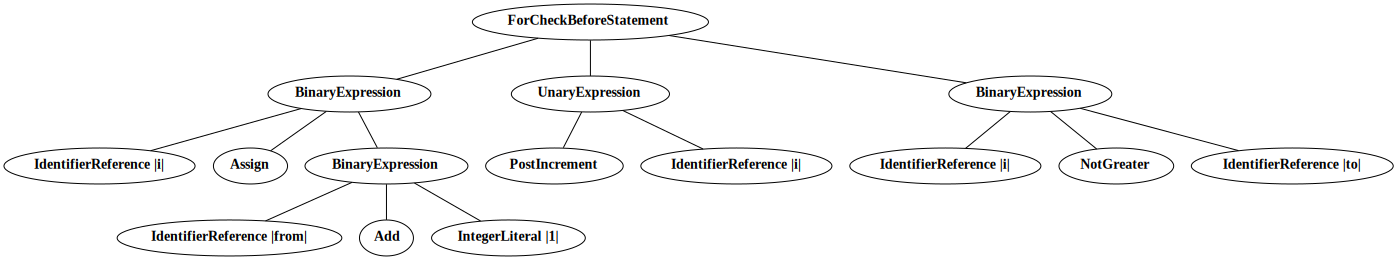

In [75]:
from visualization import AI4CodeGraphVizualizer
from AI4Code.AI4CodeJsonObject import AI4CodeJsonObject
import json
json_file = r"C:\Users\sebas\Documents\Masterarbeit\master_thesis_resources\code_samples\java_sample_astm_loop_head.json"
with open(json_file, 'r') as json_file:
    ai4code_json = json.load(json_file)

ai4code = AI4CodeJsonObject.from_json(ai4code_json)
ast = ai4code.get_graph().get_root_node()
AI4CodeGraphVizualizer.visualize_ast(ast)

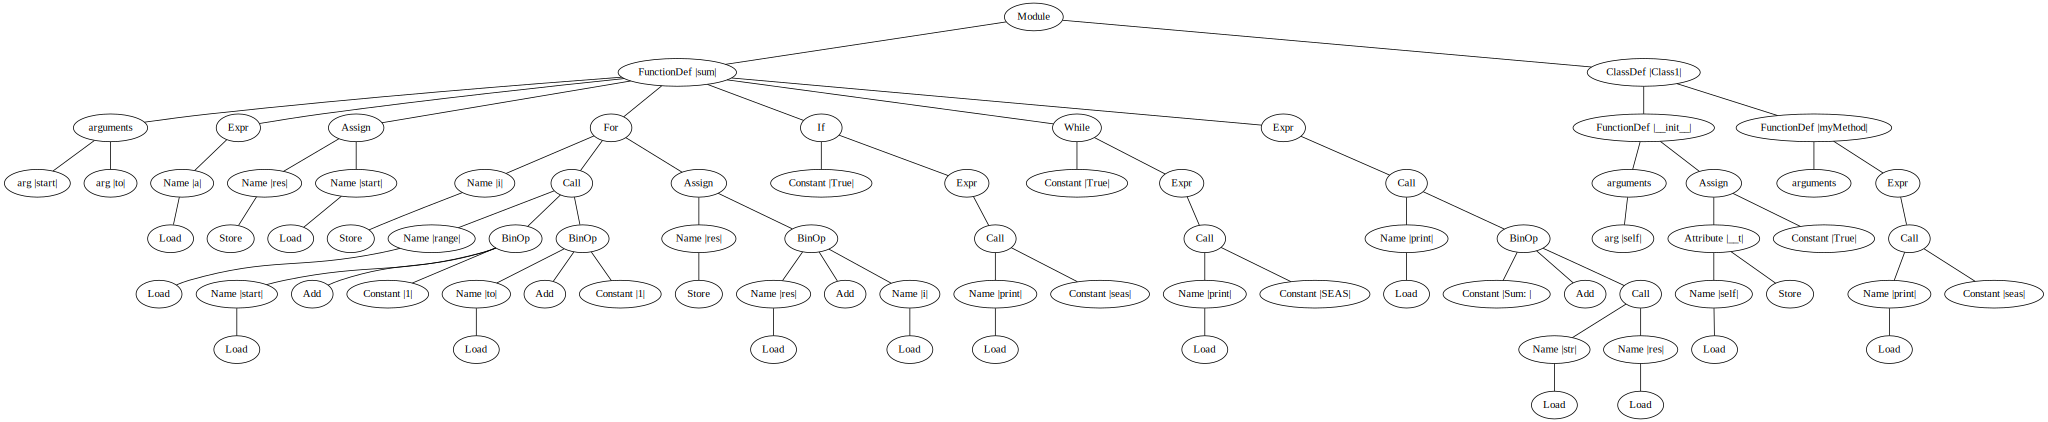

In [2]:
from visualization import AI4CodeGraphVizualizer
from AI4Code.AI4CodeJsonObject import AI4CodeJsonObject
import json
json_file = r"C:\Users\sebas\Documents\Masterarbeit\master_thesis_resources\code_samples\python_sample.json"
with open(json_file, 'r') as json_file:
    ai4code_json = json.load(json_file)

ai4code = AI4CodeJsonObject.from_json(ai4code_json)
ast = ai4code.get_graph().get_root_node()
AI4CodeGraphVizualizer.visualize_ast(ast)

In [13]:
start = 1
to = 3
res = start
for i in range(start+1, to+1):
    res = res + i
print("Sum: " + str(res))

Sum: 6


In [36]:
from visualization import AI4CodeGraphVizualizer
from AI4Code.AI4CodeJsonObject import AI4CodeJsonObject
from AI4Code.AI4CodeStatistics import AI4CodeStatistics
import json
g_num_nodes = []
g_max_depths = []
g_avg_leaf_depths = []
g_max_arity = []
g_avg_arity = []
g_ast_vocab = []
g_token_vocab = []

import glob
samples = glob.glob(r"C:\Users\sebas\Documents\Masterarbeit\datasets\2_parallel_dataset\ai4code_astm_cpp" + r"\\**\\*.json", recursive=True)
for json_file in samples:
    with open(json_file, 'r', encoding='utf-8') as json_file:
        ai4code_json = json.load(json_file)

    ai4code = AI4CodeJsonObject.from_json(ai4code_json)
    ast = ai4code.get_graph()
    num_nodes, max_depth, avg_leaf_depth, max_arity, avg_arity, ast_vocab, token_vocab = AI4CodeStatistics.analyzeAst(ast)
    g_num_nodes.append(num_nodes)
    g_max_depths.append(max_depth)
    g_avg_leaf_depths.append(avg_leaf_depth)
    g_max_arity.append(max_arity)
    g_avg_arity.append(avg_arity)
    g_ast_vocab.extend(ast_vocab)
    g_token_vocab.extend(token_vocab)


In [37]:
astm_java_voc = set(g_token_vocab)

In [38]:
len(astm_java_voc)

20657

In [5]:
java_voc = set(g_token_vocab)

In [6]:
len(java_voc)

16993

In [9]:
astm_java_voc.difference(java_voc)

{'\x00',
 '\t',
 '\n',
 '\nTime: ',
 '\r',
 '\r\n',
 ' \n\n',
 '%.10f\n',
 '%.10f \n',
 '%.11f\n',
 '%.12f\n',
 '%.20f\n',
 '%.6f\n',
 '%.9f\n',
 '%12f\n',
 '%8d ms\n',
 '%c\n',
 '%c%c%c%c%c%c%c=7\n',
 '%d\n',
 '%d %d\n',
 '%d %d %d\n',
 '%d%c%d%c%d%c%d=7\n',
 '%d%s%d%s%d%s%d=7\n',
 '%d+%d+%d+%d=7\n',
 '%d+%d+%d-%d=7\n',
 '%d+%d-%d+%d=7\n',
 '%d+%d-%d-%d=7\n',
 '%d-%d+%d+%d=7\n',
 '%d-%d+%d-%d=7\n',
 '%d-%d-%d+%d=7\n',
 '%d-%d-%d+%d=7\n ',
 '%d-%d-%d-%d=7\n',
 '%f\n',
 '%s\n',
 '%s \n',
 '%s %s %s\n',
 "'",
 '(.)\\1*',
 '([ \\w]+)\\1',
 '(\\d){4} \\/ (\\d){2} \\/ (\\d){2}',
 '-1\n',
 '.*(.)\\1.*',
 '/|\n',
 '0\n',
 '1\n',
 '2\n',
 '3\n',
 ':(\n',
 '=7\n',
 'ABC085COtoshidama.Pochibukuro',
 'ABC085COtoshidama.Pochibukuro[][]',
 'ABC142CStudent[]',
 'AMBIGUOUS\n',
 'APPROVED\n',
 'A[]',
 'AbstractMap.SimpleEntry<>',
 'AbstractMap.SimpleEntry<K,V>',
 'AbstractMap.SimpleImmutableEntry<Integer,Integer>',
 'Answer[]',
 'Apple[]',
 'ArrayDeque<>',
 'ArrayDeque<Boolean>',
 'ArrayDeque<Characte

In [39]:
from collections import Counter
ast_counter = Counter(g_ast_vocab)

In [40]:
len(ast_counter)

102

In [41]:
ast_counter.most_common()

[('IdentifierReference', 1091566),
 ('BinaryExpression', 585919),
 ('IntegerLiteral', 315534),
 ('VariableDefinition', 312369),
 ('ExpressionStatement', 218568),
 ('UnnamedTypeReference', 212369),
 ('DeclarationOrDefinitionStatement', 176046),
 ('BlockStatement', 134038),
 ('NamedTypeReference', 133511),
 ('ByReferenceActualParameterExpression', 132460),
 ('Integer', 125348),
 ('Assign', 121878),
 ('FunctionCallExpression', 115678),
 ('ArrayAccess', 98689),
 ('BitLeftShift', 94870),
 ('UnaryExpression', 79068),
 ('BitRightShift', 67145),
 ('NameSpaceDefinition', 63975),
 ('FunctionDefinition', 57530),
 ('IfStatement', 56541),
 ('Add', 55781),
 ('QualifiedOverData', 51774),
 ('ReturnStatement', 50886),
 ('ForCheckBeforeStatement', 50670),
 ('Less', 49713),
 ('PostIncrement', 48274),
 ('Subtract', 46068),
 ('FormalParameterDefinition', 40282),
 ('StringLiteral', 36627),
 ('Equal', 34130),
 ('CompilationUnit', 32371),
 ('NamedType', 26326),
 ('NamedTypeDefinition', 26101),
 ('Multiply', 2

In [42]:
from collections import Counter
counter = Counter(g_token_vocab)

In [43]:
len(counter)

20657

In [44]:
counter.most_common()

[('i', 251876),
 ('0', 143583),
 ('a', 87751),
 ('1', 83720),
 ('n', 77336),
 ('b', 60118),
 ('cin', 52326),
 ('cout', 47575),
 ('ll', 39756),
 ('ans', 36738),
 ('s', 35618),
 ('j', 35225),
 ('N', 32959),
 ('main', 32387),
 ('std', 31084),
 ('long long', 30470),
 ('x', 30323),
 ('endl', 30263),
 ('2', 24547),
 ('k', 19081),
 ('c', 18095),
 ('A', 17029),
 ('string', 13377),
 ('T', 12750),
 ('m', 12396),
 ('sum', 11988),
 ('v', 11871),
 ('y', 11791),
 ('vector<int>', 11649),
 ('p', 11512),
 ('S', 11457),
 ('false', 11151),
 ('t', 9701),
 ('B', 9619),
 ('at', 9455),
 ('tie', 9299),
 ('3', 9019),
 ('dp', 8886),
 ('d', 8711),
 ('h', 8412),
 ('r', 7968),
 ('10', 7697),
 ('l', 7366),
 ('rep', 7333),
 ('res', 6811),
 ('cnt', 6657),
 ('min', 6355),
 ('size', 6212),
 ('INF', 5935),
 ('max', 5923),
 ('true', 5846),
 ('MOD', 5800),
 ('mod', 5672),
 ('Yes', 5604),
 ('No', 5534),
 ('count', 5495),
 ('gcd', 5248),
 ('tmp', 5219),
 ('5', 5160),
 ('end', 5107),
 ('7', 5007),
 ('begin', 4973),
 ('1e9', 

In [45]:
AI4CodeStatistics.avg(g_num_nodes)

155.96521577955576

In [46]:
import numpy as np
np.average(g_num_nodes)

155.96521577955576

In [47]:
import numpy as np
np.std(g_num_nodes)

102.00935750385237

In [48]:
min(g_num_nodes)

15

In [49]:
max(g_num_nodes)

1684

In [50]:
np.average(g_max_depths)

11.100985449939762

In [51]:
np.std(g_max_depths)

2.5962957965562086

In [52]:
min(g_max_depths)

6

In [53]:
max(g_max_depths)

62

In [54]:
np.average(g_avg_leaf_depths)

6.652044557549738

In [55]:
np.std(g_avg_leaf_depths)

1.1044526625639448

In [56]:
min(g_avg_leaf_depths)

3.1869158878504673

In [57]:
max(g_avg_leaf_depths)

31.09016393442623

In [58]:
np.average(g_max_arity)

11.628494640264433

In [59]:
np.std(g_max_arity)

7.2543950870032

In [60]:
min(g_max_arity)

3

In [61]:
max(g_max_arity)

128

In [62]:
np.average(g_avg_arity)

2.0642597773481186

In [63]:
np.std(g_avg_arity)

0.1373975245551139

In [64]:
min(g_avg_arity)

1.5434782608695652

In [65]:
max(g_avg_arity)

4.078947368421052

In [42]:
import glob
samples = glob.glob(r"C:\Users\sebas\Documents\Masterarbeit\datasets\2_parallel_dataset\ai4code_cpp" + r"\\**\\*.json", recursive=True)

In [43]:
samples

['C:\\Users\\sebas\\Documents\\Masterarbeit\\datasets\\2_parallel_dataset\\ai4code_cpp\\p02717\\s001843194.json',
 'C:\\Users\\sebas\\Documents\\Masterarbeit\\datasets\\2_parallel_dataset\\ai4code_cpp\\p02717\\s006100093.json',
 'C:\\Users\\sebas\\Documents\\Masterarbeit\\datasets\\2_parallel_dataset\\ai4code_cpp\\p02717\\s008529289.json',
 'C:\\Users\\sebas\\Documents\\Masterarbeit\\datasets\\2_parallel_dataset\\ai4code_cpp\\p02717\\s013552803.json',
 'C:\\Users\\sebas\\Documents\\Masterarbeit\\datasets\\2_parallel_dataset\\ai4code_cpp\\p02717\\s015311415.json',
 'C:\\Users\\sebas\\Documents\\Masterarbeit\\datasets\\2_parallel_dataset\\ai4code_cpp\\p02717\\s017119316.json',
 'C:\\Users\\sebas\\Documents\\Masterarbeit\\datasets\\2_parallel_dataset\\ai4code_cpp\\p02717\\s018763924.json',
 'C:\\Users\\sebas\\Documents\\Masterarbeit\\datasets\\2_parallel_dataset\\ai4code_cpp\\p02717\\s019127230.json',
 'C:\\Users\\sebas\\Documents\\Masterarbeit\\datasets\\2_parallel_dataset\\ai4code_cpp\\

## Duplicate Submission

In [2]:
import os
dupl_clusters_path = r"C:\Users\sebas\Documents\Masterarbeit\Project_CodeNet\derived\duplicates\C++\clusters"
cluster_files = os.listdir(dupl_clusters_path)
cluster_dict = {}
cluster_no = 0
cluster_dict[cluster_no] = 0
for cluster_file in cluster_files:
    cluster_file_path = f"{dupl_clusters_path}\\{cluster_file}"
    with open(cluster_file_path, 'r', encoding='utf-8') as file:
        while (line := file.readline()):
            line = line.rstrip()
            if (line == ''):
                cluster_no += 1
                cluster_dict[cluster_no] = 0
            else:
                cluster_dict[cluster_no] += 1

In [5]:
len(cluster_dict)

3464695

In [9]:
num_files = 0
cluster_dict_clean = {}
for key, value in cluster_dict.items():
    if value > 1:
        cluster_dict_clean[key] = value

In [11]:
len(cluster_dict_clean)

288541

In [ ]:
from matplotlib import pyplot as plt
